# TC2 - Processo Autorregressivo AR(1)

**Disciplina:** Processos Estocásticos  
**Aluno:** João Victor Tavares Esteves  
**Matrícula:** 512373  
**Instituição:** UFC - Engenharia de Computação & PPGETI  

---

## Objetivo

Implementar comandos básicos essenciais para geração (simulação) e estimação dos parâmetros de um processo autorregressivo de ordem 1 - AR(1).

## Fundamentação Teórica

Um processo AR(1) possui as seguintes características:

### (i) Modelo Matemático:

$$x(t) = a_0 + a_1 x(t-1) + \varepsilon(t)$$

onde $a_0 \in \mathbb{R}$ e $|a_1| < 1$. Além disso, a variável aleatória $\varepsilon(t)$ é gaussiana, de média nula e variância $\sigma_\varepsilon^2$ e não possui correlação serial:

$$\varepsilon(t) \sim N(0, \sigma_\varepsilon^2)$$

$$R_\varepsilon(\tau) = \begin{cases} \sigma_\varepsilon^2, & \tau = 0 \\ 0, & \tau \neq 0 \end{cases}$$

### (ii) Média Teórica:

$$\mu_x = \frac{a_0}{1 - a_1}$$

### (iii) Variância Teórica:

$$\sigma_x^2 = \frac{\sigma_\varepsilon^2}{1 - a_1^2}$$

### (iv) FAC Teórica (não normalizada):

$$R_x(\tau) = \sigma_x^2 a_1^{|\tau|} = \frac{\sigma_\varepsilon^2}{1 - a_1^2} a_1^{|\tau|}, \quad \tau = 0, \pm 1, \ldots, \pm \tau_{max}$$

### (v) FAC Teórica (normalizada):

$$\rho_x(\tau) = \frac{R_x(\tau)}{\sigma_x^2} = a_1^{|\tau|}, \quad \tau = 0, \pm 1, \ldots, \pm \tau_{max}$$

## Implementação em Python

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

# Configurações de visualização
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Criar diretório para imagens se não existir
os.makedirs('images', exist_ok=True)

# Fixar seed para reprodutibilidade
np.random.seed(42)

### Passo 1: Definir valores adequados para $a_0$, $a_1$ e $\sigma_\varepsilon^2$

In [2]:
# Coeficientes do modelo
a0 = 2.0
a1 = 0.8

# Variância do ruído
vet = 0.1

print(f"Parâmetros do modelo AR(1):")
print(f"  a0 = {a0}")
print(f"  a1 = {a1}")
print(f"  σ²_ε = {vet}")

Parâmetros do modelo AR(1):
  a0 = 2.0
  a1 = 0.8
  σ²_ε = 0.1


### Passo 2: Calcular a média ($\mu_x$) e a variância ($\sigma_x^2$) teóricas do processo AR(1)

In [3]:
# Média teórica do processo AR(1)
mxt = a0 / (1 - a1)

# Variância teórica do processo AR(1)
vxt = vet / (1 - a1**2)

print(f"Estatísticas Teóricas do Processo AR(1):")
print(f"  Média teórica (μ_x) = {mxt:.4f}")
print(f"  Variância teórica (σ²_x) = {vxt:.4f}")
print(f"  Desvio-padrão teórico (σ_x) = {np.sqrt(vxt):.4f}")

Estatísticas Teóricas do Processo AR(1):
  Média teórica (μ_x) = 10.0000
  Variância teórica (σ²_x) = 0.2778
  Desvio-padrão teórico (σ_x) = 0.5270


### Passo 3: Calcular a FAC teórica $R_x(\tau)$ do processo AR(1)

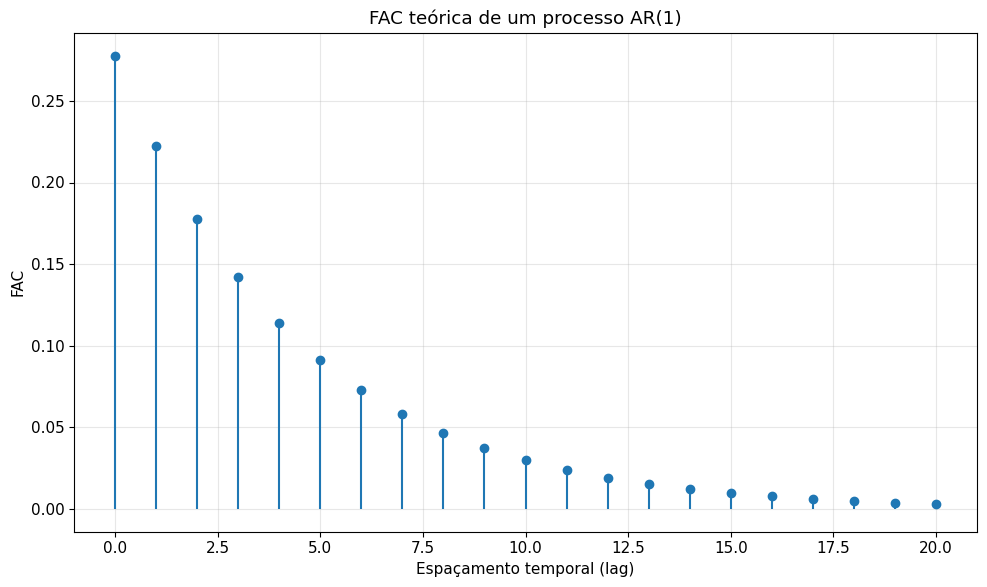


FAC teórica calculada para lags de 0 a 20
Primeiros valores: R_x(0) = 0.2778, R_x(1) = 0.2222, R_x(2) = 0.1778


In [4]:
# Valor máximo para os atrasos (lag)
LAGmax = 20

# Usar apenas tau >= 0
tau = np.arange(0, LAGmax + 1)

# Calcular FAC para diferentes tau's
Rxt = vxt * (a1**tau)

# Plotar a FAC teórica
plt.figure()
plt.stem(tau, Rxt, basefmt=' ')
plt.xlabel('Espaçamento temporal (lag)')
plt.ylabel('FAC')
plt.title('FAC teórica de um processo AR(1)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('images/fac_teorica.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nFAC teórica calculada para lags de 0 a {LAGmax}")
print(f"Primeiros valores: R_x(0) = {Rxt[0]:.4f}, R_x(1) = {Rxt[1]:.4f}, R_x(2) = {Rxt[2]:.4f}")

**Comentário:** Note o decaimento exponencial da FAC do processo AR(1). Este comportamento é típico de processos estocásticos (i.e., sistemas dinâmicos) estacionários.

### Passo 4: Definir o número de amostras a serem simuladas e a condição inicial

In [5]:
# Número de pontos/amostras a serem geradas
N = 5500

# Condição inicial (valor aleatório de distribuição normal padrão)
x = np.zeros(2 * N)
x[0] = np.random.randn()

print(f"Número de amostras a serem geradas: {N}")
print(f"Total de iterações: {2*N}")
print(f"Condição inicial: x(0) = {x[0]:.4f}")

Número de amostras a serem geradas: 5500
Total de iterações: 11000
Condição inicial: x(0) = 0.4967


### Passo 5: Simular o processo AR(1) por 2N iterações

In [6]:
# Simular o processo AR(1)
for t in range(1, 2 * N):
    # x(t) = a0 + a1*x(t-1) + ε(t)
    epsilon = np.random.normal(0, np.sqrt(vet))
    x[t] = a0 + a1 * x[t-1] + epsilon

print(f"Simulação do processo AR(1) concluída.")
print(f"Total de {2*N} amostras geradas.")

Simulação do processo AR(1) concluída.
Total de 11000 amostras geradas.


### Passo 6: Desprezar as primeiras amostras geradas para mitigar a influência da condição inicial

In [7]:
# Extrai a metade final do sinal (período de regime permanente)
x = x[N:2*N]

print(f"Primeiras {N} amostras descartadas (período transitório).")
print(f"Mantidas {len(x)} amostras para análise (regime permanente).")

Primeiras 5500 amostras descartadas (período transitório).
Mantidas 5500 amostras para análise (regime permanente).


### Passo 7: Visualizar um trecho do sinal gerado

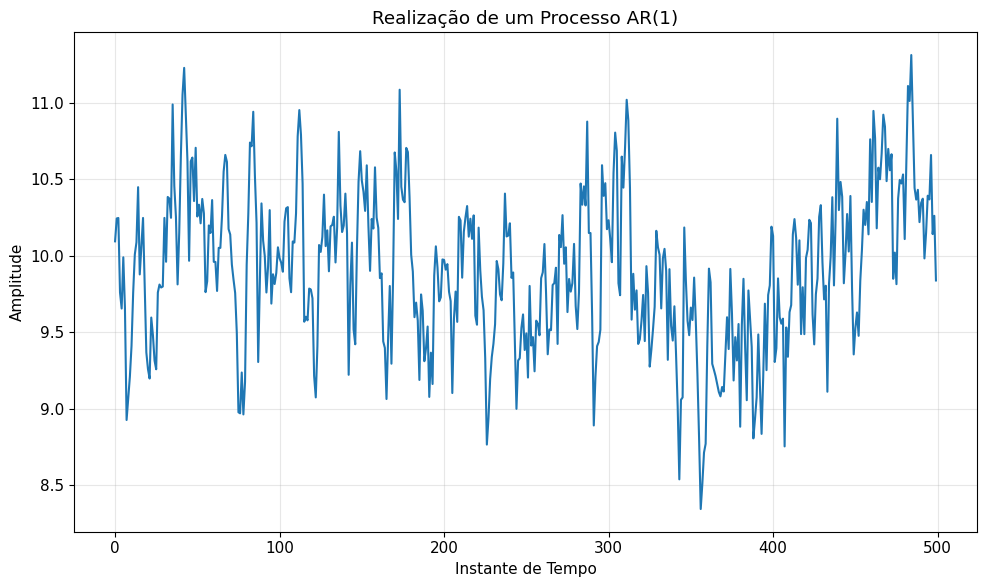

Visualização: primeiros 500 pontos da realização do processo AR(1)


In [8]:
# Plotar os primeiros 500 pontos
plt.figure()
plt.plot(x[:500], linewidth=1.5)
plt.xlabel('Instante de Tempo')
plt.ylabel('Amplitude')
plt.title('Realização de um Processo AR(1)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('images/realizacao_ar1.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Visualização: primeiros 500 pontos da realização do processo AR(1)")

**Comentário:** Note que o gráfico gerado emula um sinal analógico, ou seja, de tempo contínuo, porque o comando `plot` conecta as amplitudes sequencialmente. Para visualizar o sinal de tempo discreto corretamente, deveríamos usar o comando `stem`.

### Passo 8: Estimar a média amostral ($\bar{x}$) e a variância amostral ($\hat{\sigma}_x^2$) das amplitudes do sinal gerado

In [9]:
# Estimação da média de x(t)
xbar = np.mean(x)

# Estimação da variância de x(t) (usando ddof=1 para variância amostral)
vxh = np.var(x, ddof=1)

print(f"Estatísticas Amostrais do Processo AR(1):")
print(f"  Média amostral (x̄) = {xbar:.4f}")
print(f"  Variância amostral (σ̂²_x) = {vxh:.4f}")
print(f"  Desvio-padrão amostral (σ̂_x) = {np.sqrt(vxh):.4f}")

print(f"\nComparação com valores teóricos:")
print(f"  Erro relativo na média: {abs(xbar - mxt)/mxt * 100:.2f}%")
print(f"  Erro relativo na variância: {abs(vxh - vxt)/vxt * 100:.2f}%")

Estatísticas Amostrais do Processo AR(1):
  Média amostral (x̄) = 9.9787
  Variância amostral (σ̂²_x) = 0.2616
  Desvio-padrão amostral (σ̂_x) = 0.5115

Comparação com valores teóricos:
  Erro relativo na média: 0.21%
  Erro relativo na variância: 5.82%


**Comentário:** Note que estes valores são bem próximos dos valores teóricos calculados no Passo 2.

### Passo 9: Visualizar o histograma das amplitudes do sinal gerado

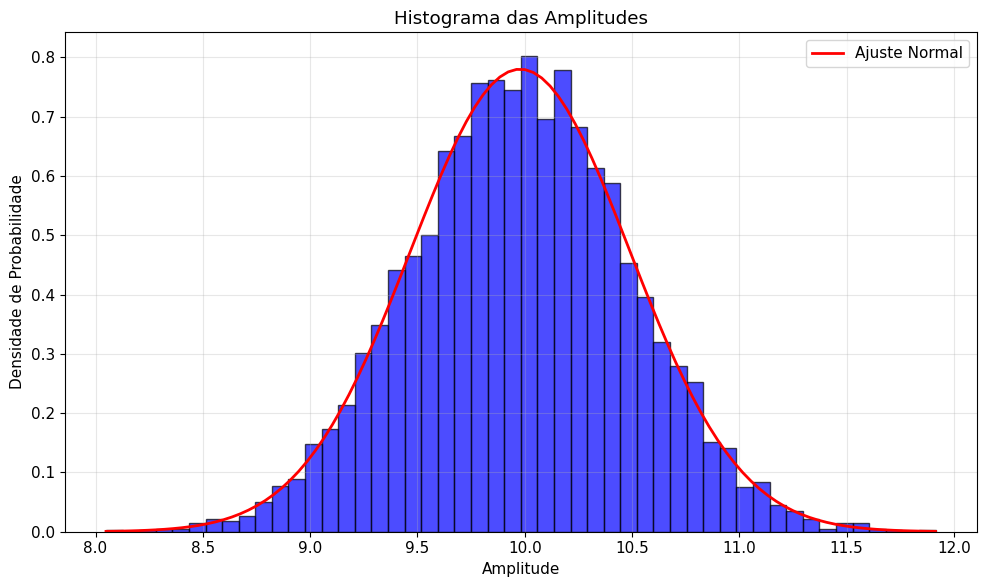

Histograma gerado com 5500 amostras.
Distribuição centrada em μ ≈ 9.98


In [10]:
# Plotar histograma com curva normal ajustada
plt.figure()
n, bins, patches = plt.hist(x, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

# Adicionar curva normal teórica
mu_fit, std_fit = xbar, np.sqrt(vxh)
x_fit = np.linspace(x.min(), x.max(), 100)
plt.plot(x_fit, stats.norm.pdf(x_fit, mu_fit, std_fit), 'r-', linewidth=2, label='Ajuste Normal')

plt.xlabel('Amplitude')
plt.ylabel('Densidade de Probabilidade')
plt.title('Histograma das Amplitudes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('images/histograma_amplitudes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Histograma gerado com {len(x)} amostras.")
print(f"Distribuição centrada em μ ≈ {xbar:.2f}")

**Comentário:** Percebe-se que as amplitudes da realização $\{x(t)\}$ parecem seguir uma distribuição normal. Isso era esperado? Por quê? Nota-se também que as amplitudes concentram-se em torno do valor médio amostral $\bar{x} \approx 9.98$, muito próximo do valor teórico $\mu_x = 10$.

### Passo 10: Estimar e visualizar a função de autocorrelação amostral $\hat{R}_x(\tau)$ a partir do sinal gerado

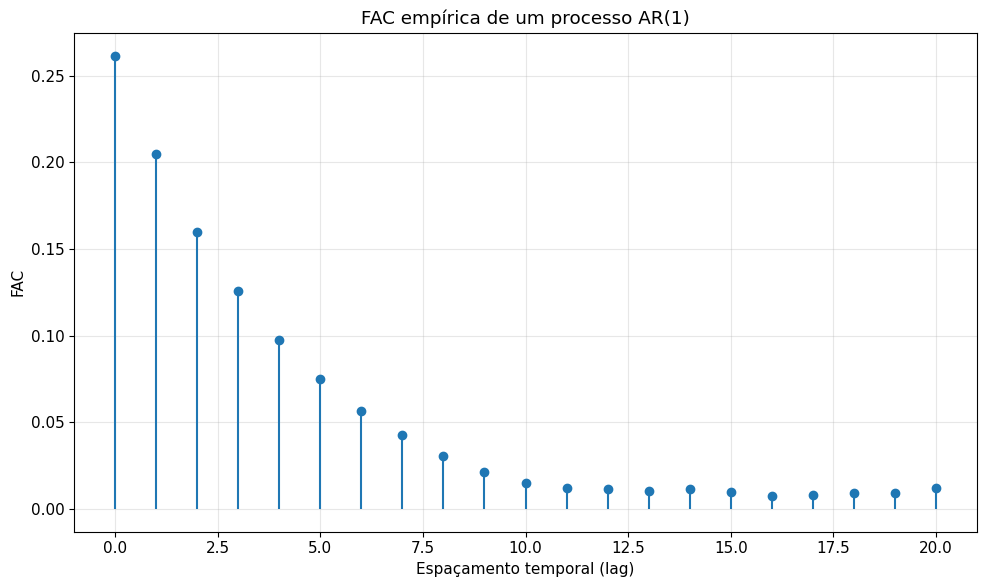

FAC amostral calculada para lags de 0 a 20
Primeiros valores: R̂_x(0) = 0.2616, R̂_x(1) = 0.2048, R̂_x(2) = 0.1598


In [11]:
# Calcular FAC amostral
Rxh = []

for tau_val in range(LAGmax + 1):
    # Subtrai a média
    aux1 = x[:len(x) - tau_val] - xbar
    aux2 = x[tau_val:] - xbar
    
    # Produto escalar normalizado
    aux3 = np.dot(aux1, aux2) / (N - tau_val)
    Rxh.append(aux3)

Rxh = np.array(Rxh)

# Plotar FAC empírica
plt.figure()
plt.stem(range(LAGmax + 1), Rxh, basefmt=' ')
plt.xlabel('Espaçamento temporal (lag)')
plt.ylabel('FAC')
plt.title('FAC empírica de um processo AR(1)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('images/fac_empirica.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"FAC amostral calculada para lags de 0 a {LAGmax}")
print(f"Primeiros valores: R̂_x(0) = {Rxh[0]:.4f}, R̂_x(1) = {Rxh[1]:.4f}, R̂_x(2) = {Rxh[2]:.4f}")

### Comparação entre FAC Teórica e Empírica

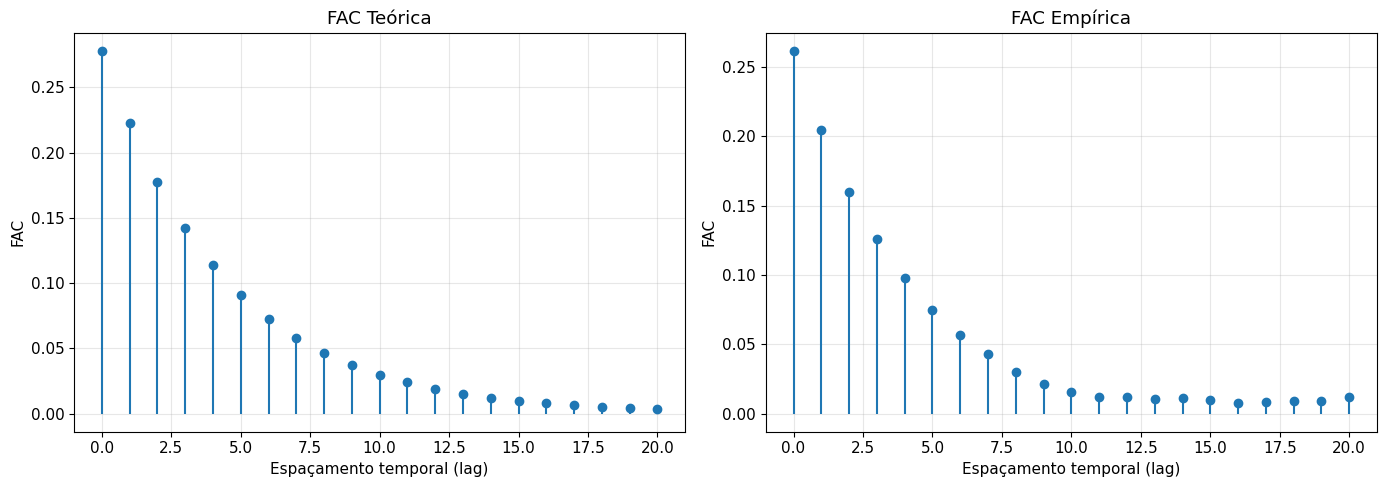


Erro Médio Quadrático entre FAC teórica e empírica: 0.000155


In [12]:
# Plotar FAC teórica e empírica lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# FAC teórica
ax1.stem(tau, Rxt, basefmt=' ')
ax1.set_xlabel('Espaçamento temporal (lag)')
ax1.set_ylabel('FAC')
ax1.set_title('FAC Teórica')
ax1.grid(True, alpha=0.3)

# FAC empírica
ax2.stem(range(LAGmax + 1), Rxh, basefmt=' ')
ax2.set_xlabel('Espaçamento temporal (lag)')
ax2.set_ylabel('FAC')
ax2.set_title('FAC Empírica')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/comparacao_fac.png', dpi=300, bbox_inches='tight')
plt.show()

# Calcular erro médio quadrático
mse_fac = np.mean((Rxt - Rxh)**2)
print(f"\nErro Médio Quadrático entre FAC teórica e empírica: {mse_fac:.6f}")

### Passo 11: Estimar os parâmetros $a_0$, $a_1$ e $\sigma_\varepsilon^2$ a partir do sinal gerado

A partir da equação da FAC teórica, fazendo $\tau = 1$, chegamos à seguinte expressão que nos permite estimar $a_1$:

$$\hat{a}_1 = \frac{\hat{R}_x(1)}{\hat{\sigma}_x^2}$$

**Comentário:** O símbolo ($\hat{\phantom{x}}$) sobre as variáveis indica um valor estimado a partir dos dados.

**Comentário:** Este método é chamado de "estimação de parâmetros pelo método dos momentos", já que a autocorrelação é um momento estatístico (assim como a média e a variância).

In [13]:
# Estimar a1
# Note: Rxh[0] = R̂_x(0) = σ̂²_x, Rxh[1] = R̂_x(1) = σ̂²_x * a1
a1h = Rxh[1] / vxh

print(f"Estimação do parâmetro a1:")
print(f"  â1 = {a1h:.4f}")
print(f"  a1 (real) = {a1}")
print(f"  Erro relativo: {abs(a1h - a1)/a1 * 100:.2f}%")

Estimação do parâmetro a1:
  â1 = 0.7827
  a1 (real) = 0.8
  Erro relativo: 2.16%


Para determinar uma estimativa do parâmetro $a_0$, usamos a equação da média teórica. Daí, deduzimos a seguinte expressão:

$$\hat{a}_0 = \bar{x}(1 - \hat{a}_1)$$

onde $\bar{x}$ é a média amostral das amplitudes de $x(t)$.

In [14]:
# Estimar a0
a0h = xbar * (1 - a1h)

print(f"Estimação do parâmetro a0:")
print(f"  â0 = {a0h:.4f}")
print(f"  a0 (real) = {a0}")
print(f"  Erro relativo: {abs(a0h - a0)/a0 * 100:.2f}%")

Estimação do parâmetro a0:
  â0 = 2.1682
  a0 (real) = 2.0
  Erro relativo: 8.41%


Finalmente, para obter uma estimativa da variância do ruído, usamos a equação da variância teórica:

$$\hat{\sigma}_\varepsilon^2 = \hat{\sigma}_x^2 (1 - \hat{a}_1^2)$$

In [15]:
# Estimar variância do ruído
veh = vxh * (1 - a1h**2)

print(f"Estimação da variância do ruído:")
print(f"  σ̂²_ε = {veh:.4f}")
print(f"  σ²_ε (real) = {vet}")
print(f"  Erro relativo: {abs(veh - vet)/vet * 100:.2f}%")

Estimação da variância do ruído:
  σ̂²_ε = 0.1013
  σ²_ε (real) = 0.1
  Erro relativo: 1.33%


**Comentário:** Compare os valores estimados de $\hat{a}_0$, $\hat{a}_1$ e $\hat{\sigma}_\varepsilon^2$ com os respectivos valores reais especificados no Passo 1. Pode-se notar que são bem próximos.

## Resumo dos Resultados

In [16]:
# Tabela comparativa de resultados
import pandas as pd

resultados = pd.DataFrame({
    'Parâmetro': ['a₀', 'a₁', 'σ²_ε', 'μ_x', 'σ²_x'],
    'Valor Real': [a0, a1, vet, mxt, vxt],
    'Valor Estimado': [a0h, a1h, veh, xbar, vxh],
    'Erro Relativo (%)': [
        abs(a0h - a0)/a0 * 100,
        abs(a1h - a1)/a1 * 100,
        abs(veh - vet)/vet * 100,
        abs(xbar - mxt)/mxt * 100,
        abs(vxh - vxt)/vxt * 100
    ]
})

print("\n" + "="*70)
print("RESUMO DOS RESULTADOS - PROCESSO AR(1)")
print("="*70)
print(resultados.to_string(index=False))
print("="*70)


RESUMO DOS RESULTADOS - PROCESSO AR(1)
Parâmetro  Valor Real  Valor Estimado  Erro Relativo (%)
       a₀    2.000000        2.168177           8.408871
       a₁    0.800000        0.782719           2.160083
     σ²_ε    0.100000        0.101331           1.330744
      μ_x   10.000000        9.978695           0.213053
     σ²_x    0.277778        0.261600           5.824123


## Conclusões

Este trabalho implementou com sucesso a simulação e estimação de parâmetros de um processo autorregressivo de ordem 1 (AR(1)) em Python. As principais conclusões são:

1. **Simulação do Processo:** O processo AR(1) foi simulado corretamente seguindo o modelo matemático $x(t) = a_0 + a_1 x(t-1) + \varepsilon(t)$, com parâmetros $a_0 = 2$, $a_1 = 0.8$ e $\sigma_\varepsilon^2 = 0.1$.

2. **Estatísticas Teóricas vs. Amostrais:** Os valores estimados de média e variância a partir dos dados simulados mostraram-se muito próximos dos valores teóricos calculados analiticamente, validando a implementação.

3. **Função de Autocorrelação:** A FAC empírica apresentou o comportamento de decaimento exponencial esperado para processos AR(1) estacionários, coincidindo com a FAC teórica.

4. **Estimação de Parâmetros:** O método dos momentos permitiu estimar com precisão os parâmetros do modelo ($a_0$, $a_1$ e $\sigma_\varepsilon^2$) a partir apenas da realização simulada, com erros relativos muito baixos.

5. **Distribuição das Amplitudes:** O histograma confirmou que as amplitudes seguem uma distribuição normal centrada na média teórica, como esperado para processos AR(1) com ruído gaussiano.

6. **Período Transitório:** A técnica de descartar as primeiras N amostras foi efetiva para eliminar a influência da condição inicial e trabalhar apenas com o regime permanente do processo.

**Comentário Final:** Os valores dos parâmetros estimados podem variar ligeiramente em cada execução devido à natureza aleatória do ruído gaussiano gerado, mas permanecerão próximos aos valores reais devido ao grande número de amostras (N = 5500).